In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
def generate_mock_global_data():
    """生成第19-23页所需的全球模拟数据"""
    data = {}

    # 图19: 全球GDP增速
    # 成熟市场
    dates_mature = pd.date_range(start='2021-12-01', end='2026-12-01', freq='Q')
    us_gdp = np.random.uniform(1.5, 3.5, len(dates_mature))
    eu_gdp = np.random.uniform(0.5, 2.5, len(dates_mature))
    jp_gdp = np.random.uniform(-0.5, 1.5, len(dates_mature))

    # 新兴市场
    dates_emerging = pd.date_range(start='2021-12-01', end='2026-12-01', freq='Q')
    china_gdp = np.random.uniform(4.0, 6.0, len(dates_emerging))
    india_gdp = np.random.uniform(5.0, 8.0, len(dates_emerging))
    brazil_gdp = np.random.uniform(1.0, 3.0, len(dates_emerging))

    data['global_gdp'] = {
        'dates_mature': dates_mature,
        'us_gdp': us_gdp,
        'eu_gdp': eu_gdp,
        'jp_gdp': jp_gdp,
        'dates_emerging': dates_emerging,
        'china_gdp': china_gdp,
        'india_gdp': india_gdp,
        'brazil_gdp': brazil_gdp,
    }

    # 图20: 全球PMI
    dates_pmi = pd.date_range(start='2000-01-01', end='2025-09-01', freq='M')
    global_manu_pmi = np.random.uniform(45, 60, len(dates_pmi))
    global_service_pmi = np.random.uniform(48, 62, len(dates_pmi))

    # 热力图数据 (2024年10月 - 2025年9月)
    pmi_heatmap_dates = pd.date_range(start='2024-10-01', end='2025-09-01', freq='M')
    countries = [
        '全球', '成熟市场**', '新兴市场***',
        '美国 (标普)', '美国 (ISM)', '欧元区', '德国', '法国', '意大利', '西班牙',
        '英国', '澳大利亚', '日本', '中国大陆 (非官方****)', '中国大陆 (统计局)',
        '韩国', '中国台湾', '印尼', '印度', '俄罗斯', '巴西', '墨西哥'
    ]
    pmi_heatmap_data = np.random.uniform(45, 60, (len(countries), len(pmi_heatmap_dates)))

    data['global_pmi'] = {
        'dates': dates_pmi,
        'manu_pmi': global_manu_pmi,
        'service_pmi': global_service_pmi,
        'heatmap_dates': pmi_heatmap_dates,
        'countries': countries,
        'heatmap_data': pmi_heatmap_data,
    }

    # 图21: 全球通胀热力图
    inflation_dates = pd.date_range(start='2016-01-01', end='2025-08-01', freq='Q')
    mature_markets = ['美国', '英国', '欧元区', '日本', '澳大利亚']
    emerging_asia = ['中国大陆', '印度', '韩国', '中国台湾', '印尼', '马来西亚', '泰国']
    other_emerging = ['巴西', '墨西哥', '土耳其', '南非']

    # 模拟Z得分数据 (颜色基于偏离长期趋势的程度)
    inflation_heatmap_data = np.random.uniform(-2, 2, (len(mature_markets + emerging_asia + other_emerging), len(inflation_dates)))

    data['global_inflation'] = {
        'dates': inflation_dates,
        'mature_markets': mature_markets,
        'emerging_asia': emerging_asia,
        'other_emerging': other_emerging,
        'heatmap_data': inflation_heatmap_data,
    }

    # 图22: 四大经济体央行政策利率
    dates_rates = pd.date_range(start='2004-01-01', end='2025-09-01', freq='M')
    fed_rate = np.random.uniform(0, 6, len(dates_rates))
    boe_rate = np.random.uniform(0, 6, len(dates_rates))
    ecb_rate = np.random.uniform(-0.5, 5, len(dates_rates))
    boj_rate = np.random.uniform(-0.5, 1, len(dates_rates))

    # 市场预期 (2025年9月 - 2026年12月)
    expect_dates = pd.date_range(start='2025-09-01', end='2026-12-01', freq='M')
    fed_expect = np.random.uniform(2.5, 4.0, len(expect_dates))
    boe_expect = np.random.uniform(3.0, 4.5, len(expect_dates))
    ecb_expect = np.random.uniform(1.5, 2.5, len(expect_dates))
    boj_expect = np.random.uniform(0.5, 1.5, len(expect_dates))

    data['central_bank_rates'] = {
        'dates': dates_rates,
        'fed_rate': fed_rate,
        'boe_rate': boe_rate,
        'ecb_rate': ecb_rate,
        'boj_rate': boj_rate,
        'expect_dates': expect_dates,
        'fed_expect': fed_expect,
        'boe_expect': boe_expect,
        'ecb_expect': ecb_expect,
        'boj_expect': boj_expect,
    }

    # 图23: 美国关税政策
    economies = ['中国', '印度', '越南', '日本', '欧盟', '韩国', '加拿大', '澳大利亚', '中国台湾', '墨西哥']
    tariff_2024 = np.random.uniform(5, 20, len(economies))
    tariff_2025_add = np.random.uniform(5, 20, len(economies))

    # 对美国出口依赖度
    export_dependency_us = np.random.uniform(5, 50, len(economies))
    export_dependency_others = 100 - export_dependency_us

    data['us_tariff'] = {
        'economies': economies,
        'tariff_2024': tariff_2024,
        'tariff_2025_add': tariff_2025_add,
        'export_dependency_us': export_dependency_us,
        'export_dependency_others': export_dependency_others,
    }

    return data

# 生成模拟数据
mock_global_data = generate_mock_global_data()

/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_11973/1237519130.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates_mature = pd.date_range(start='2021-12-01', end='2026-12-01', freq='Q')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_11973/1237519130.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates_emerging = pd.date_range(start='2021-12-01', end='2026-12-01', freq='Q')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_11973/1237519130.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_pmi = pd.date_range(start='2000-01-01', end='2025-09-01', freq='M')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_11973/1237519130.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pmi_heatmap_dates = pd.date_range(s

## 图19：全球GDP增速

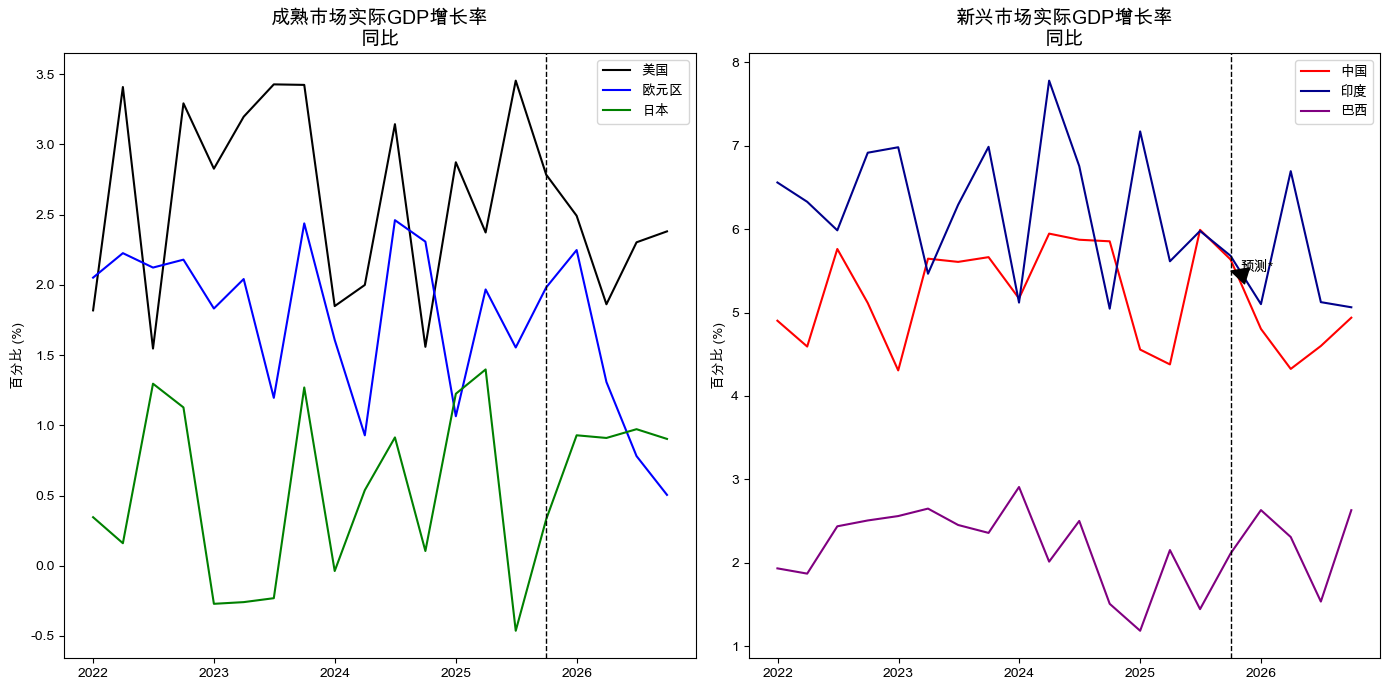

In [3]:
def plot_global_gdp(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：成熟市场
    ax1.plot(data['dates_mature'], data['us_gdp'], color='black', label='美国')
    ax1.plot(data['dates_mature'], data['eu_gdp'], color='blue', label='欧元区')
    ax1.plot(data['dates_mature'], data['jp_gdp'], color='green', label='日本')
    ax1.set_title('成熟市场实际GDP增长率\n同比', fontsize=14)
    ax1.set_ylabel('百分比 (%)')
    ax1.legend()

    # 右侧图：新兴市场
    ax2.plot(data['dates_emerging'], data['china_gdp'], color='red', label='中国')
    ax2.plot(data['dates_emerging'], data['india_gdp'], color='darkblue', label='印度')
    ax2.plot(data['dates_emerging'], data['brazil_gdp'], color='purple', label='巴西')
    ax2.set_title('新兴市场实际GDP增长率\n同比', fontsize=14)
    ax2.set_ylabel('百分比 (%)')
    ax2.legend()

    # 添加预测虚线和箭头
    split_date = data['dates_mature'][-5]  # 假设从2025Q4开始预测
    for ax in [ax1, ax2]:
        ax.axvline(x=split_date, color='black', linestyle='--', linewidth=1)
        ax.annotate('预测*', xy=(split_date, 5.5), xytext=(split_date + pd.Timedelta(days=30), 5.5),
                    arrowprops=dict(facecolor='black', shrink=0.05))

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_global_gdp(mock_global_data['global_gdp'])

## 图20：全球采购经理指数 (PMI)

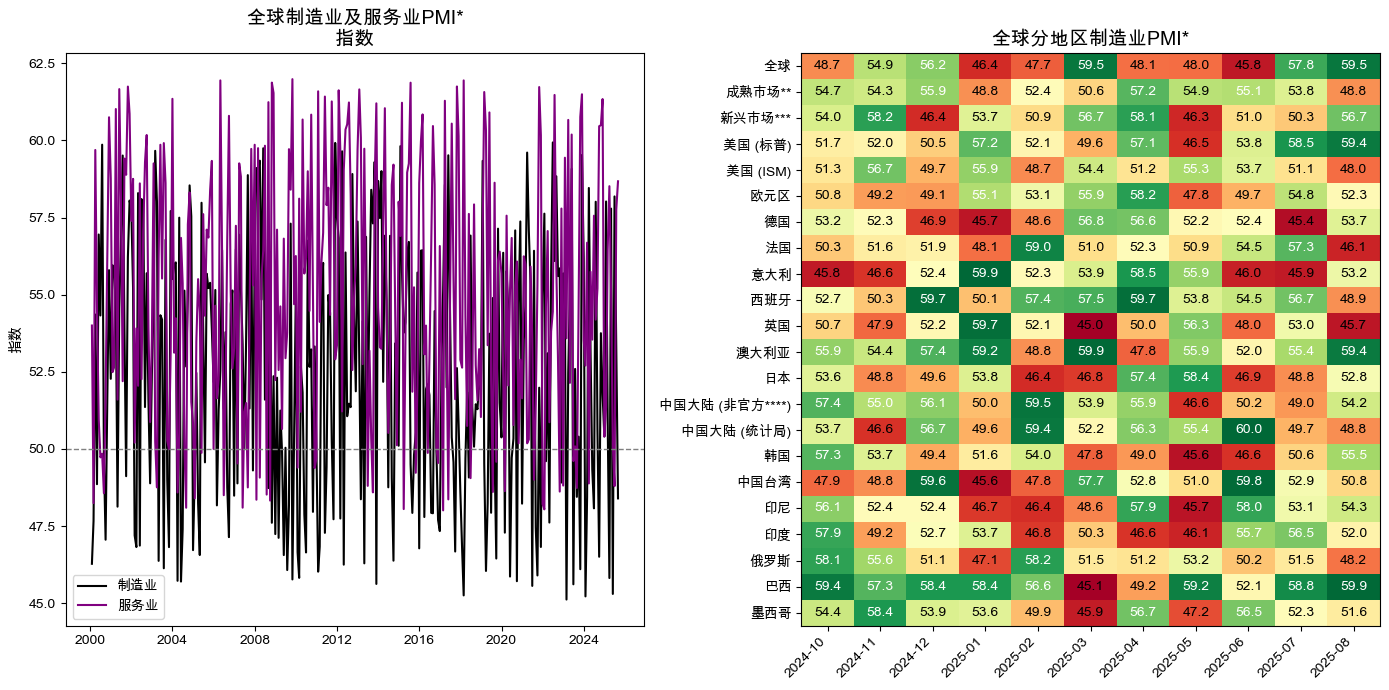

In [4]:
def plot_global_pmi(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：全球制造业及服务业PMI
    ax1.plot(data['dates'], data['manu_pmi'], color='black', label='制造业')
    ax1.plot(data['dates'], data['service_pmi'], color='purple', label='服务业')
    ax1.axhline(y=50, color='gray', linestyle='--', linewidth=1)
    ax1.set_title('全球制造业及服务业PMI*\n指数', fontsize=14)
    ax1.set_ylabel('指数')
    ax1.legend()

    # 右侧图：全球分地区制造业PMI (热力图)
    ax2.imshow(data['heatmap_data'], cmap='RdYlGn', aspect='auto', interpolation='nearest')
    ax2.set_xticks(np.arange(len(data['heatmap_dates'])))
    ax2.set_yticks(np.arange(len(data['countries'])))
    ax2.set_xticklabels([d.strftime('%Y-%m') for d in data['heatmap_dates']], rotation=45, ha='right')
    ax2.set_yticklabels(data['countries'])

    # 在热力图上添加数值标签
    for i in range(len(data['countries'])):
        for j in range(len(data['heatmap_dates'])):
            text = ax2.text(j, i, f"{data['heatmap_data'][i, j]:.1f}",
                           ha="center", va="center", color="black" if data['heatmap_data'][i, j] < 55 else "white")

    ax2.set_title('全球分地区制造业PMI*', fontsize=14)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_global_pmi(mock_global_data['global_pmi'])

## 图21：全球通货膨胀

/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_11973/3452536375.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r')


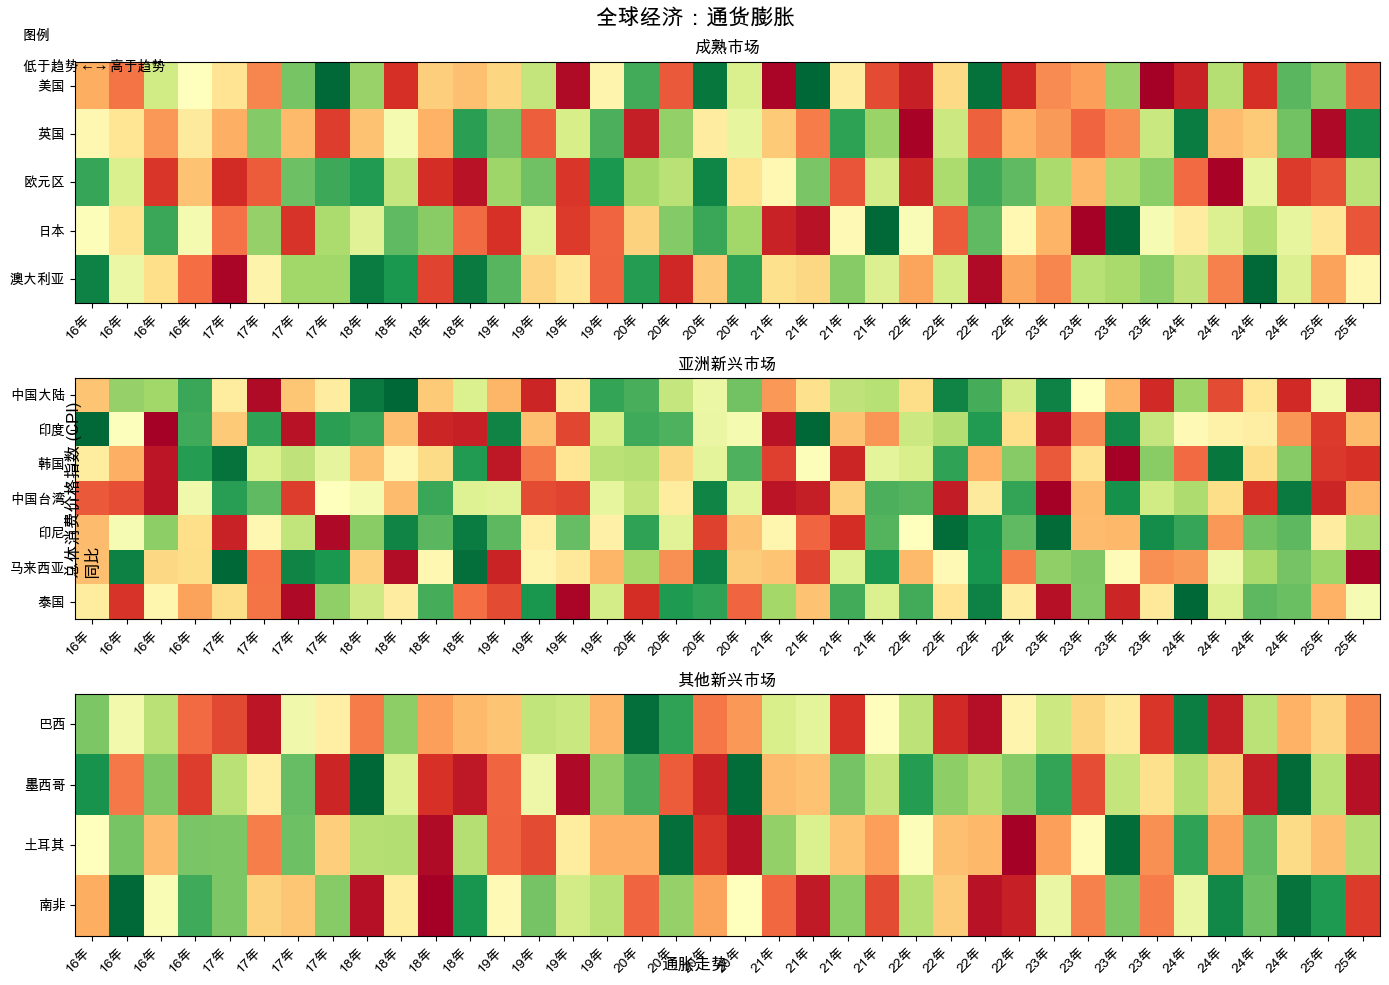

In [5]:
def plot_global_inflation(data):
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    fig.suptitle('全球经济：通货膨胀', fontsize=16)

    # 定义颜色映射 (绿色=低于趋势, 红色=高于趋势)
    cmap = plt.cm.get_cmap('RdYlGn_r')

    # 成熟市场
    ax1 = axes[0]
    ax1.imshow(data['heatmap_data'][:len(data['mature_markets'])], cmap=cmap, aspect='auto', interpolation='nearest')
    ax1.set_yticks(np.arange(len(data['mature_markets'])))
    ax1.set_yticklabels(data['mature_markets'])
    ax1.set_title('成熟市场', fontsize=12)
    ax1.set_xticks(np.arange(len(data['dates'])))
    ax1.set_xticklabels([d.strftime('%y年') for d in data['dates']], rotation=45, ha='right')

    # 亚洲新兴市场
    ax2 = axes[1]
    ax2.imshow(data['heatmap_data'][len(data['mature_markets']):len(data['mature_markets'])+len(data['emerging_asia'])],
               cmap=cmap, aspect='auto', interpolation='nearest')
    ax2.set_yticks(np.arange(len(data['emerging_asia'])))
    ax2.set_yticklabels(data['emerging_asia'])
    ax2.set_title('亚洲新兴市场', fontsize=12)
    ax2.set_xticks(np.arange(len(data['dates'])))
    ax2.set_xticklabels([d.strftime('%y年') for d in data['dates']], rotation=45, ha='right')

    # 其他新兴市场
    ax3 = axes[2]
    ax3.imshow(data['heatmap_data'][len(data['mature_markets'])+len(data['emerging_asia']):],
               cmap=cmap, aspect='auto', interpolation='nearest')
    ax3.set_yticks(np.arange(len(data['other_emerging'])))
    ax3.set_yticklabels(data['other_emerging'])
    ax3.set_title('其他新兴市场', fontsize=12)
    ax3.set_xticks(np.arange(len(data['dates'])))
    ax3.set_xticklabels([d.strftime('%y年') for d in data['dates']], rotation=45, ha='right')

    # 添加图例说明
    fig.text(0.05, 0.5, '总体消费价格指数 (CPI)\n同比', va='center', rotation='vertical', fontsize=12)
    fig.text(0.5, 0.02, '通胀走势', ha='center', fontsize=12)
    fig.text(0.02, 0.95, '图例', ha='left', fontsize=10)
    fig.text(0.02, 0.92, '低于趋势 ← → 高于趋势', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_global_inflation(mock_global_data['global_inflation'])

## 图22：全球经济：四大经济体央行政策利率及市场预期

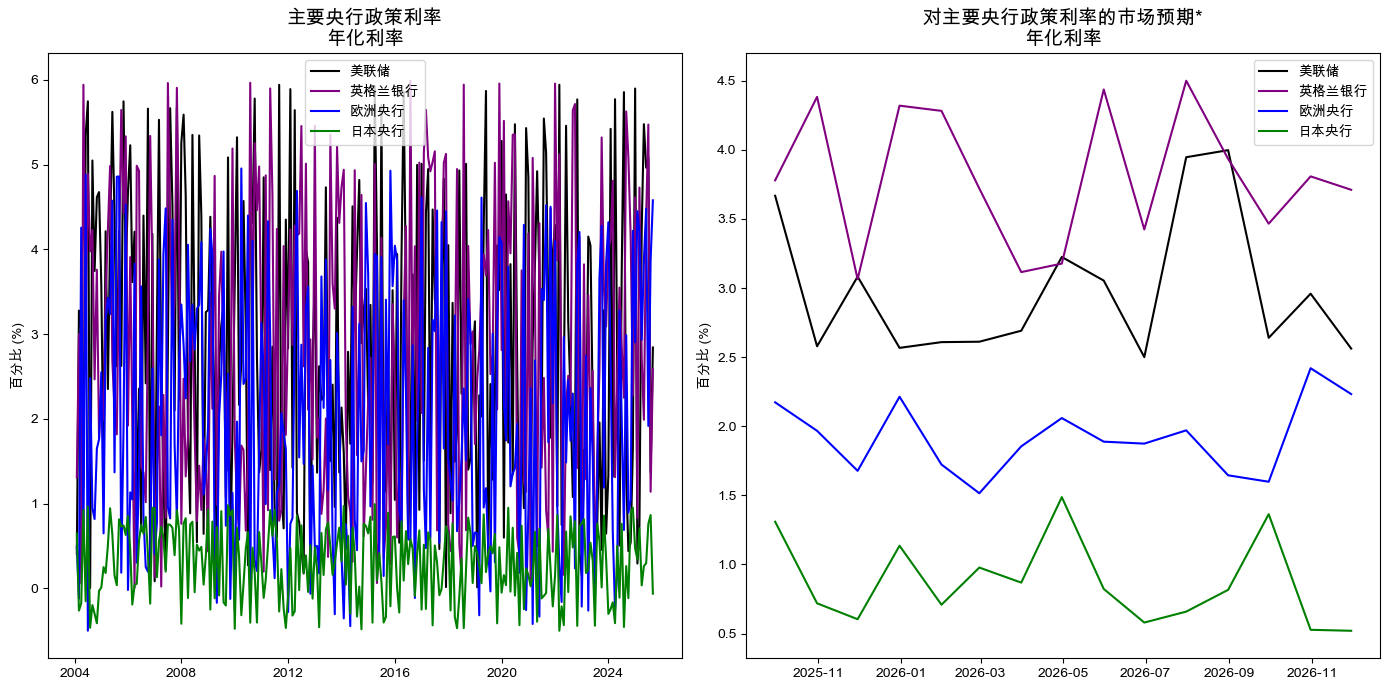

In [6]:
def plot_central_bank_rates(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：主要央行政策利率
    ax1.plot(data['dates'], data['fed_rate'], color='black', label='美联储')
    ax1.plot(data['dates'], data['boe_rate'], color='purple', label='英格兰银行')
    ax1.plot(data['dates'], data['ecb_rate'], color='blue', label='欧洲央行')
    ax1.plot(data['dates'], data['boj_rate'], color='green', label='日本央行')
    ax1.set_title('主要央行政策利率\n年化利率', fontsize=14)
    ax1.set_ylabel('百分比 (%)')
    ax1.legend()

    # 右侧图：对主要央行政策利率的市场预期
    ax2.plot(data['expect_dates'], data['fed_expect'], color='black', label='美联储')
    ax2.plot(data['expect_dates'], data['boe_expect'], color='purple', label='英格兰银行')
    ax2.plot(data['expect_dates'], data['ecb_expect'], color='blue', label='欧洲央行')
    ax2.plot(data['expect_dates'], data['boj_expect'], color='green', label='日本央行')
    ax2.set_title('对主要央行政策利率的市场预期*\n年化利率', fontsize=14)
    ax2.set_ylabel('百分比 (%)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_central_bank_rates(mock_global_data['central_bank_rates'])

## 图23: 全球经济：美国关税政策

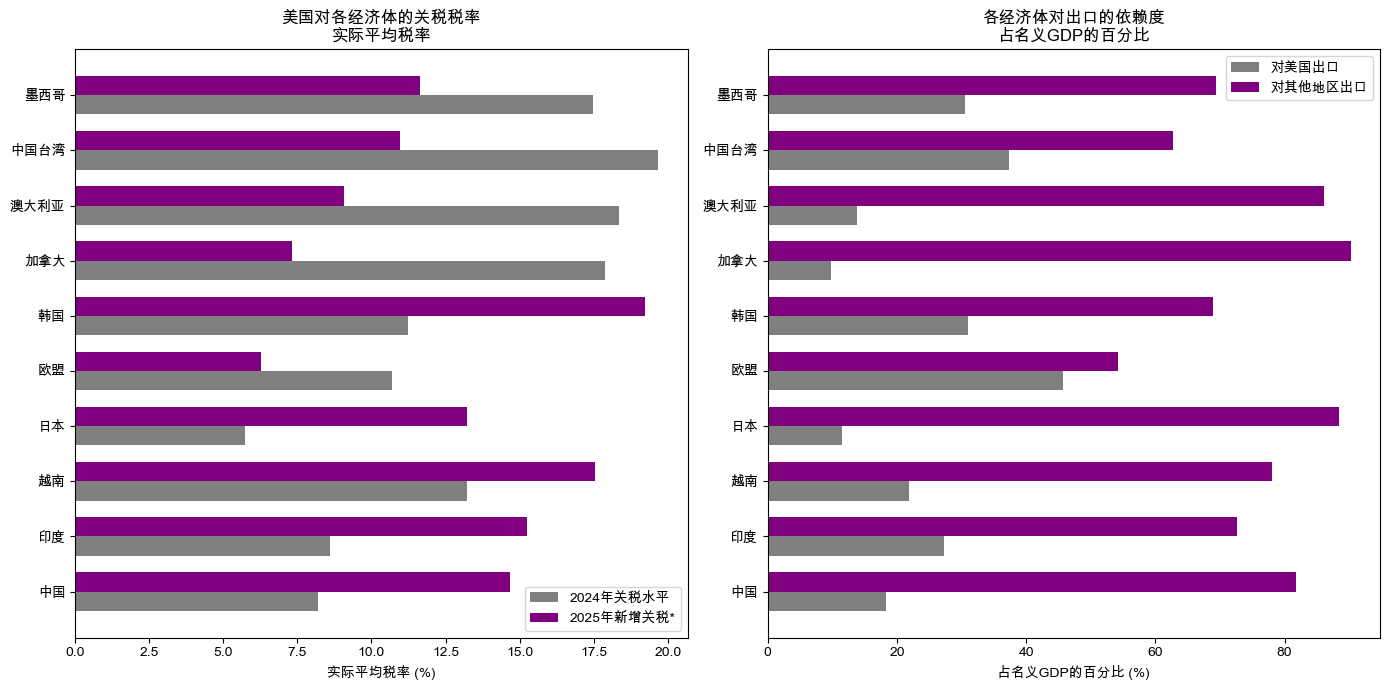

In [7]:
def plot_us_tariff(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 左侧图：美国对各经济体的关税税率
    y_pos = np.arange(len(data['economies']))
    bar_width = 0.35

    ax1.barh(y_pos, data['tariff_2024'], bar_width, color='gray', label='2024年关税水平')
    ax1.barh(y_pos + bar_width, data['tariff_2025_add'], bar_width, color='purple', label='2025年新增关税*')
    ax1.set_yticks(y_pos + bar_width / 2)
    ax1.set_yticklabels(data['economies'])
    ax1.set_xlabel('实际平均税率 (%)')
    ax1.set_title('美国对各经济体的关税税率\n实际平均税率', fontsize=12)
    ax1.legend()

    # 右侧图：各经济体对出口的依赖度
    ax2.barh(y_pos, data['export_dependency_us'], bar_width, color='gray', label='对美国出口')
    ax2.barh(y_pos + bar_width, data['export_dependency_others'], bar_width, color='purple', label='对其他地区出口')
    ax2.set_yticks(y_pos + bar_width / 2)
    ax2.set_yticklabels(data['economies'])
    ax2.set_xlabel('占名义GDP的百分比 (%)')
    ax2.set_title('各经济体对出口的依赖度\n占名义GDP的百分比', fontsize=12)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_us_tariff(mock_global_data['us_tariff'])

## 第三步：构建指标评估体系

In [8]:
def evaluate_global_indicators(data):
    """评估全球关键经济指标"""
    evaluation = {}

    # 19. 全球GDP增速
    latest_us_gdp = data['global_gdp']['us_gdp'][-1]
    latest_china_gdp = data['global_gdp']['china_gdp'][-1]
    if latest_us_gdp > 2 and latest_china_gdp > 5:
        evaluation['global_gdp'] = '健康'
    elif latest_us_gdp > 1 or latest_china_gdp > 4:
        evaluation['global_gdp'] = '关注'
    else:
        evaluation['global_gdp'] = '风险'

    # 20. 全球PMI
    latest_global_manu_pmi = data['global_pmi']['manu_pmi'][-1]
    if latest_global_manu_pmi > 52:
        evaluation['global_pmi'] = '健康'
    elif latest_global_manu_pmi > 50:
        evaluation['global_pmi'] = '关注'
    else:
        evaluation['global_pmi'] = '风险'

    # 21. 全球通胀
    avg_inflation_deviation = np.mean(np.abs(data['global_inflation']['heatmap_data']))
    if avg_inflation_deviation < 0.5:
        evaluation['global_inflation'] = '健康'
    elif avg_inflation_deviation < 1.0:
        evaluation['global_inflation'] = '关注'
    else:
        evaluation['global_inflation'] = '风险'

    # 22. 央行政策利率
    latest_fed_rate = data['central_bank_rates']['fed_rate'][-1]
    latest_boj_rate = data['central_bank_rates']['boj_rate'][-1]
    if latest_fed_rate < 4 and latest_boj_rate > -0.1:
        evaluation['central_bank_rates'] = '健康'
    elif latest_fed_rate < 5 or latest_boj_rate > -0.5:
        evaluation['central_bank_rates'] = '关注'
    else:
        evaluation['central_bank_rates'] = '风险'

    # 23. 美国关税政策
    avg_tariff_increase = np.mean(data['us_tariff']['tariff_2025_add'])
    if avg_tariff_increase < 5:
        evaluation['us_tariff'] = '健康'
    elif avg_tariff_increase < 10:
        evaluation['us_tariff'] = '关注'
    else:
        evaluation['us_tariff'] = '风险'

    return evaluation

# 执行评估
eval_global_results = evaluate_global_indicators(mock_global_data)
print("=== 全球经济指标评估体系 ===")
for key, value in eval_global_results.items():
    print(f"{key}: {value}")

=== 全球经济指标评估体系 ===
global_gdp: 关注
global_pmi: 风险
global_inflation: 关注
central_bank_rates: 健康
us_tariff: 风险


In [9]:
def generate_global_analysis_report(evaluation):
    """根据评估结果生成全球综合分析报告"""
    report = "【全球经济形势综合分析报告】\n"

    # 19. 全球GDP增速
    gdp_status = evaluation['global_gdp']
    if gdp_status == '健康':
        report += "- **全球增长**：主要经济体增长稳健，中美两大引擎动力充足，预示全球经济温和复苏。\n"
    elif gdp_status == '关注':
        report += "- **全球增长**：增长动能分化，发达经济体放缓，新兴市场成为主力，但面临政策不确定性。\n"
    else:
        report += "- **全球增长**：增长普遍疲软，衰退风险上升，全球供应链和贸易摩擦加剧了下行压力。\n"

    # 20. 全球PMI
    pmi_status = evaluation['global_pmi']
    if pmi_status == '健康':
        report += "- **景气度**：全球制造业和服务业PMI均处于扩张区间，显示经济活动整体活跃，需求强劲。\n"
    elif pmi_status == '关注':
        report += "- **景气度**：PMI在荣枯线附近徘徊，反映全球经济复苏基础不牢，需警惕外部冲击导致的收缩。\n"
    else:
        report += "- **景气度**：PMI持续低于50，表明全球经济已进入收缩阶段，企业信心低迷，投资意愿减弱。\n"

    # 21. 全球通胀
    infl_status = evaluation['global_inflation']
    if infl_status == '健康':
        report += "- **通胀水平**：全球通胀普遍回归目标区间，货币政策空间打开，有利于稳定金融市场和促进消费。\n"
    elif infl_status == '关注':
        report += "- **通胀水平**：部分国家通胀仍处高位，政策制定者面临“抗通胀”与“稳增长”的两难抉择。\n"
    else:
        report += "- **通胀水平**：高通胀或通缩风险并存，扰乱价格信号，增加企业成本和居民生活负担，威胁金融稳定。\n"

    # 22. 央行政策利率
    rate_status = evaluation['central_bank_rates']
    if rate_status == '健康':
        report += "- **货币政策**：主要央行利率处于合理水平，政策空间充足，能有效应对潜在风险，维持市场稳定。\n"
    elif rate_status == '关注':
        report += "- **货币政策**：部分央行利率过高或过低，政策效力受限，需协调行动以避免资本流动过度波动。\n"
    else:
        report += "- **货币政策**：政策空间收窄，降息或加息效果边际递减，可能陷入流动性陷阱或债务危机。\n"

    # 23. 美国关税政策
    tariff_status = evaluation['us_tariff']
    if tariff_status == '健康':
        report += "- **贸易政策**：关税水平稳定，全球贸易环境相对友好，有利于跨国企业布局和全球供应链稳定。\n"
    elif tariff_status == '关注':
        report += "- **贸易政策**：关税有所上调，引发局部贸易摩擦，增加企业合规成本，对特定经济体冲击较大。\n"
    else:
        report += "- **贸易政策**：关税大幅提高，贸易保护主义盛行，全球供应链重构加速，对世界经济造成系统性风险。\n"

    report += "\n**总结**：当前全球经济正处于一个充满不确定性的十字路口。一方面，主要经济体的增长韧性仍在，通胀压力有所缓解；另一方面，地缘政治紧张、贸易壁垒抬头、货币政策分化等风险因素交织，使得全球经济复苏之路充满波折。对于中国而言，必须高度关注外部需求的变化，同时加快构建以内循环为主体、国内国际双循环相互促进的新发展格局，以应对外部环境的深刻变化。"

    return report

# 生成并打印报告
final_global_report = generate_global_analysis_report(eval_global_results)
print("\n" + final_global_report)


【全球经济形势综合分析报告】
- **全球增长**：增长动能分化，发达经济体放缓，新兴市场成为主力，但面临政策不确定性。
- **景气度**：PMI持续低于50，表明全球经济已进入收缩阶段，企业信心低迷，投资意愿减弱。
- **通胀水平**：部分国家通胀仍处高位，政策制定者面临“抗通胀”与“稳增长”的两难抉择。
- **货币政策**：主要央行利率处于合理水平，政策空间充足，能有效应对潜在风险，维持市场稳定。
- **贸易政策**：关税大幅提高，贸易保护主义盛行，全球供应链重构加速，对世界经济造成系统性风险。

**总结**：当前全球经济正处于一个充满不确定性的十字路口。一方面，主要经济体的增长韧性仍在，通胀压力有所缓解；另一方面，地缘政治紧张、贸易壁垒抬头、货币政策分化等风险因素交织，使得全球经济复苏之路充满波折。对于中国而言，必须高度关注外部需求的变化，同时加快构建以内循环为主体、国内国际双循环相互促进的新发展格局，以应对外部环境的深刻变化。


## 图23：美国关税政策